### Travel Package Purchase Prediction - Michelle Lozano

## Description
**Background and Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

**Objective**

To predict which customer is more likely to purchase the newly introduced travel package.

**Data Dictionary**

Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

**Customer interaction data: **

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer 


# 1. Loading libraries
**Import Necessary Libraries**

In [1]:
pip install xgboost

In [2]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
from sklearn import metrics

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get Logisticmodels
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

#Standarize data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 2. Loading and exploring the data
**Load the data**

In [3]:
data = pd.read_excel (r'Tourism.xlsx', sheet_name='Tourism')
type(data)

pandas.core.frame.DataFrame

**Data format check**

In [4]:
data.sample(n=3, random_state=4)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4043,204043,0,50.0,Self Enquiry,1,27.0,Small Business,Female,4,4.0,Deluxe,5.0,Married,3.0,0,1,1,1.0,Manager,25245.0
2342,202342,0,33.0,Company Invited,3,NaN,Small Business,Female,2,3.0,Deluxe,3.0,Married,2.0,0,3,0,1.0,Manager,19539.0
1659,201659,0,51.0,Self Enquiry,1,9.0,Small Business,Female,3,3.0,Super Deluxe,4.0,Single,4.0,0,5,1,1.0,AVP,28734.0


In [5]:
data[data["Gender"]=='Fe Male'].head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
22,200022,0,34.0,Self Enquiry,1,13.0,Salaried,Fe Male,2,3.0,Standard,4.0,Unmarried,1.0,0,3,1,0.0,Senior Manager,26994.0
55,200055,0,33.0,Company Invited,1,6.0,Salaried,Fe Male,3,3.0,Standard,3.0,Unmarried,2.0,1,2,1,0.0,Senior Manager,28458.0
116,200116,0,34.0,Self Enquiry,1,11.0,Small Business,Fe Male,2,4.0,Standard,5.0,Unmarried,3.0,0,2,0,0.0,Senior Manager,26631.0
131,200131,0,50.0,Company Invited,3,18.0,Small Business,Fe Male,3,3.0,Standard,3.0,Unmarried,5.0,0,5,0,0.0,Senior Manager,24208.0
154,200154,0,32.0,Company Invited,3,14.0,Small Business,Fe Male,2,3.0,Standard,3.0,Unmarried,2.0,0,4,1,1.0,Senior Manager,23998.0


# 3. Processing columns
**Cleaning data: removing typos from Gender: female or male**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
# Analyzing categorical or dummies variables outpu
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [9]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male      2916
Female    1972
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Executive         1842
Man

# 4. Basic summary statistics and consequences

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


**Observations**
- Low percentage of population has purchased a package, approximated 18% of the customers.
- Mean of customers is 37 and more than 50% of the customers live in the highest development level (Tier 1).
- On average pitch last 15 days, 4 followups are done after the sale and satisfaction score is 3.
- On average customers 3 persons and 1 kid take the trip with the customer and prefer 4 start hotels.
- 30% of customers have passport and 62% own a car.
- Monthly income shows outliers for low and high income and mean is 23K.
- Accoridng to mean and median, most of the variables are normally distributed, hence, missing values will be replaced for mean .

## 5.Missing value

In [11]:
# Missing values
data.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [12]:
col_miss=['DurationOfPitch','Age','NumberOfTrips','NumberOfChildrenVisiting','NumberOfFollowups','PreferredPropertyStar']
for i in col_miss:
    data[i].fillna(data[i].mean(), inplace=True) 
    data[i] = data[i].apply(lambda x: round(x) )

In [13]:
data.MonthlyIncome.fillna(data.MonthlyIncome.mean(), inplace=True) 

In [14]:
# For missing values respect text variables, it is replaced by mode
data.TypeofContact = data.TypeofContact.apply(lambda x: 'Self Enquiry' if x is np.nan else x)
data.TypeofContact.value_counts(normalize=True)

Self Enquiry       0.709697
Company Invited    0.290303
Name: TypeofContact, dtype: float64

In [15]:
# Missing values
data.isnull().sum().sort_values(ascending=False)

CustomerID                  0
ProdTaken                   0
Designation                 0
NumberOfChildrenVisiting    0
OwnCar                      0
PitchSatisfactionScore      0
Passport                    0
NumberOfTrips               0
MaritalStatus               0
PreferredPropertyStar       0
ProductPitched              0
NumberOfFollowups           0
NumberOfPersonVisiting      0
Gender                      0
Occupation                  0
DurationOfPitch             0
CityTier                    0
TypeofContact               0
Age                         0
MonthlyIncome               0
dtype: int64

**Univariate Analysis**

In [16]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to create histogram and boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    plt.hist(data[feature], bins=bins)
    plt.title(feature)
    plt.show()
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

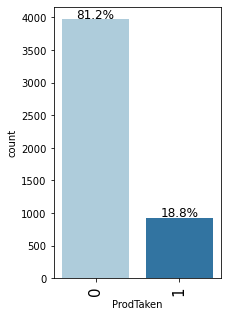

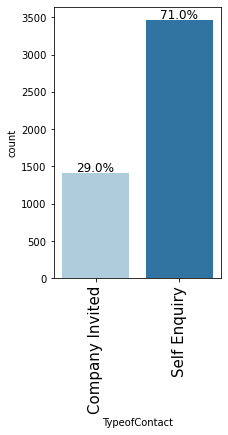

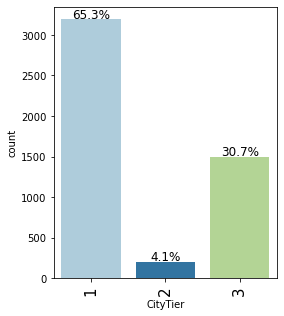

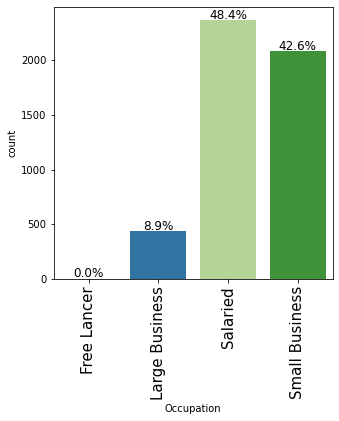

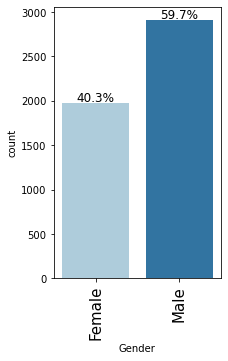

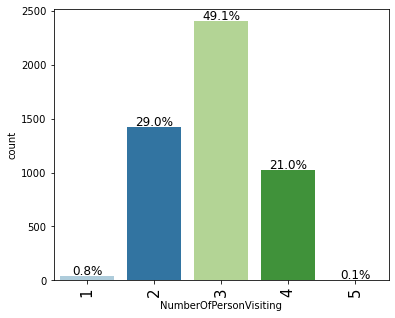

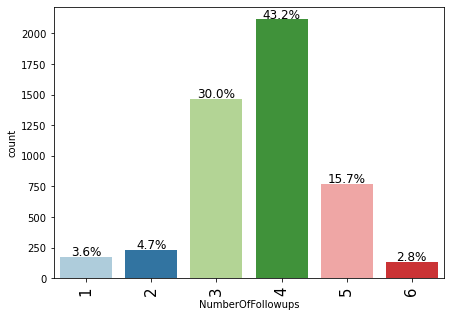

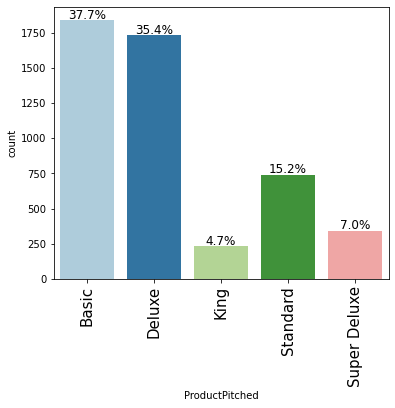

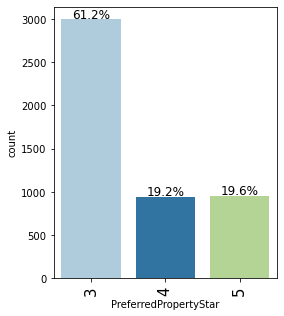

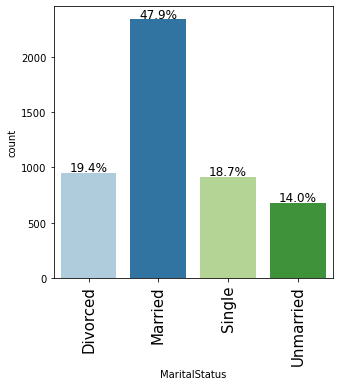

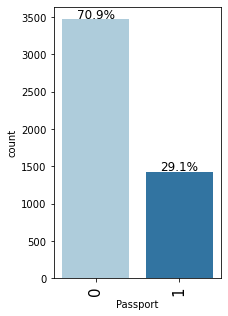

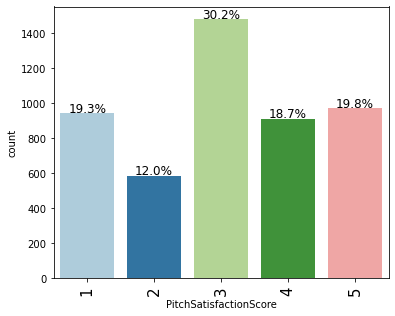

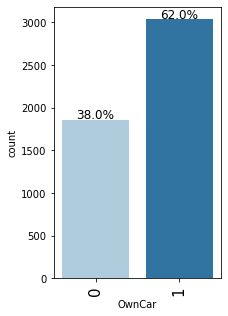

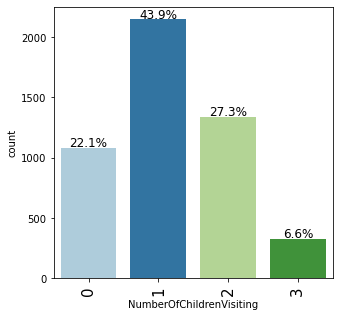

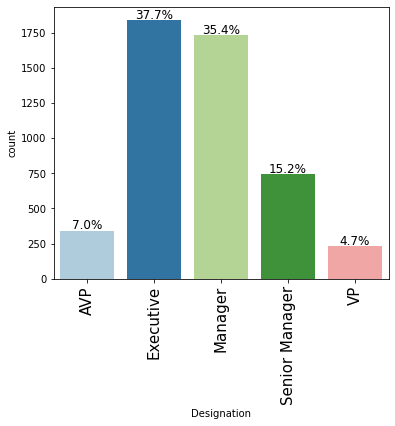

In [20]:
cols_class = ['ProdTaken','TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']
for i in cols_class:
    labeled_barplot(data, i, perc=True)

**Summary EDA - Univariate Analysis - Categorical variables**
- The product has been purchased 19% from the customers.
- The customer was contacted 30% by company invited and 70% by sel enquiry.
- Customers belong 65% to tier 1, 4% to tier 2 and 30% to tier 3.
- Customer occupations is distributed 9% to large business, 38% to salaried and 42% to small business.
- Gender distribution stands fro 40% to female and 60% to male.
- Total number of persons planning to take the trip with the customer represents 30% to 2, 50% to 3 and 20% to 4.
- Number of followups =1 represents to 3.6%,2 to 5%, 3 to  30%, 4 to 43%,5 to 16% and 6 to 3%.
- Basic trip represents 37%, standard 15%, deluxe 35%, super deluxe 7% and king 5%.
- Most of the customers (60%) prefer 3 starts.
- Half of the customers are married.
- 30% of the customers have a passport and 62% own a car.
- Majority show a pitch satisfaction of 3.
- 44% of the customers take 1 kid to the trip.
- Most of the customer are executive or manager position , only 5% represents VP.

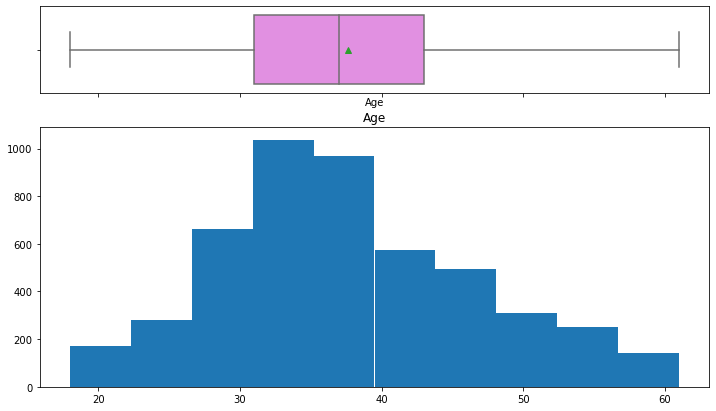

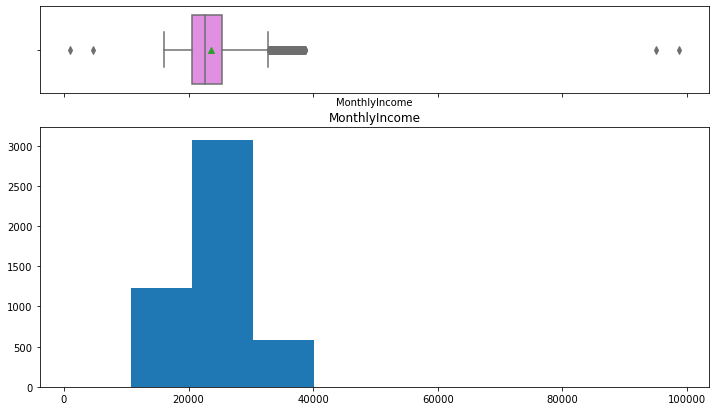

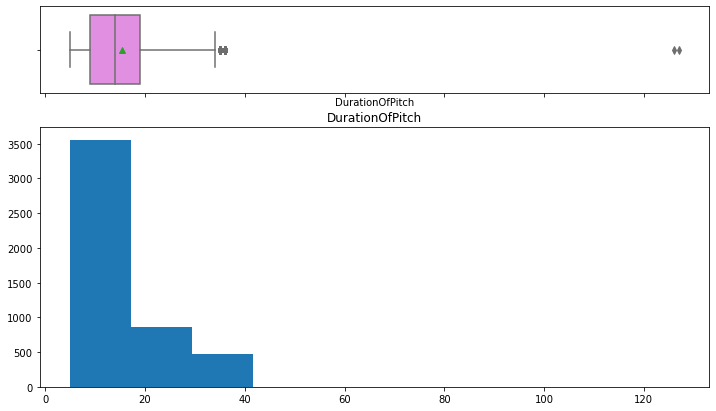

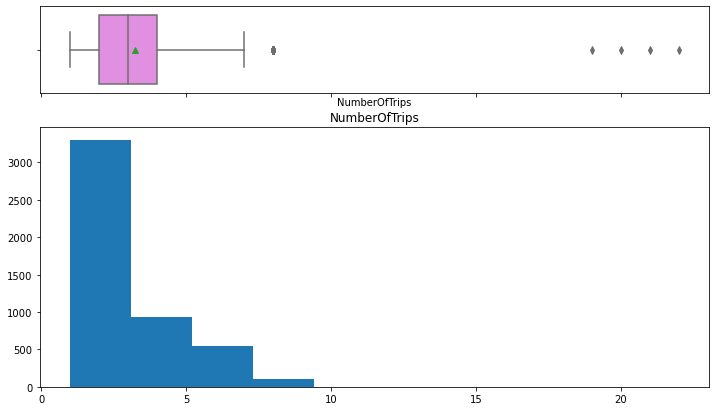

In [21]:
cols_num=['Age', 'MonthlyIncome','DurationOfPitch','NumberOfTrips']
for i in cols_num:
    histogram_boxplot(data, i)

**Summary EDA - Univariate Analysis - Continuous variables**
- Age is normally distributed, customer mean represents 37.
- Monthly income, duration of pitch and number of trips are right skewed since large outliers are visible.

**Bivariate Analysis**

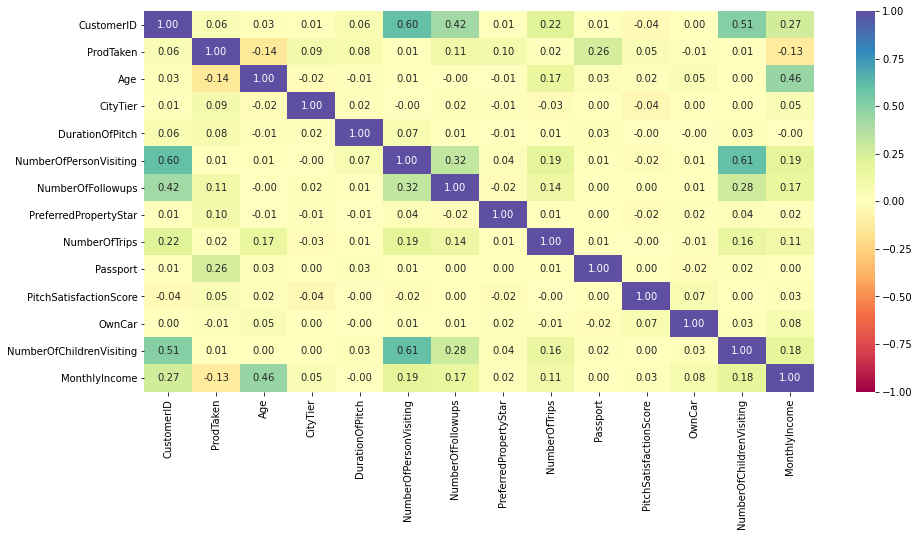

In [22]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Summary EDA - Bivariate Analysis - Correlation**
- Main variable product taken has negative correlation respect age and monthly income. In contrast, having passport has positive correlation against taking the product.
- Others correlations between product taken are low and more analyses are needed to conclude any impact.
- There are high absolut correlations between number of person visiting and number of children visiting since families with more children will invite more poeple to the trip. Therefore, multicollinearity can appear and number of children is avoided from the analysis.

ProdTaken     0    1   All
ProdTaken                 
1             0  920   920
All        3968  920  4888
0          3968    0  3968
------------------------------------------------------------------------------------------------------------------------


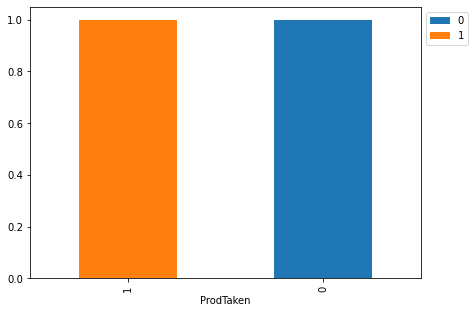

ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2859  610  3469
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


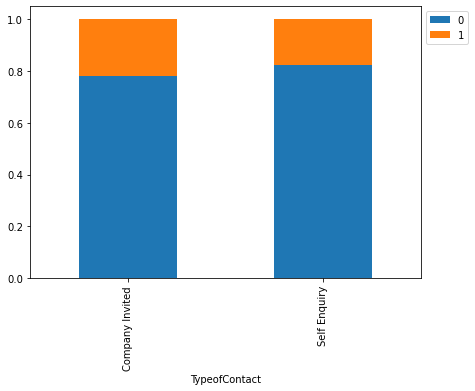

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


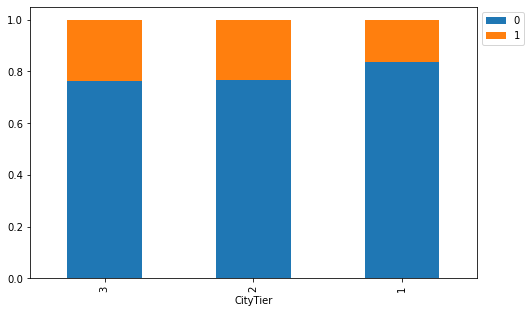

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


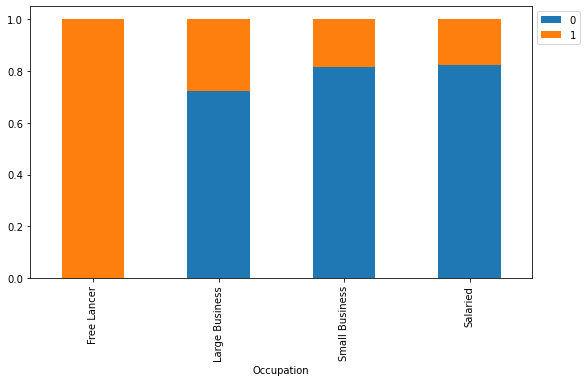

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


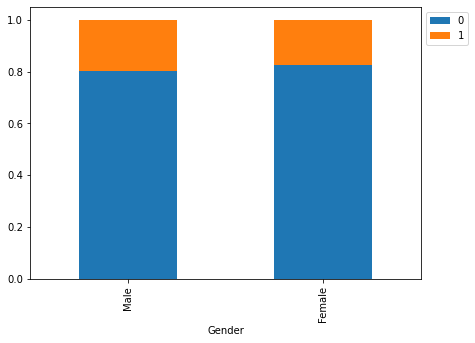

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


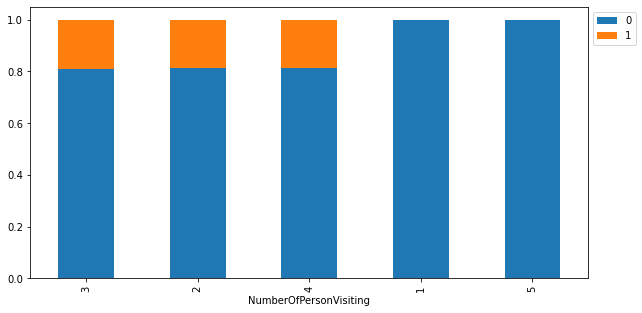

ProdTaken             0    1   All
NumberOfFollowups                 
All                3968  920  4888
4                  1726  387  2113
3                  1222  244  1466
5                   577  191   768
6                    82   54   136
2                   205   24   229
1                   156   20   176
------------------------------------------------------------------------------------------------------------------------


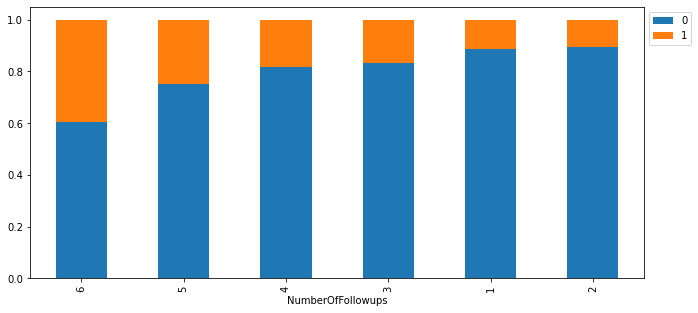

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


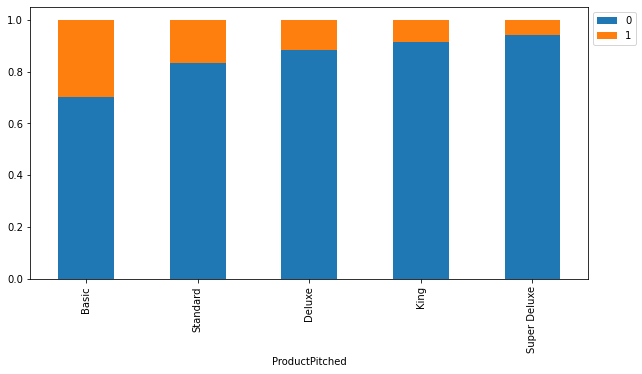

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3                      2511  482  2993
5                       706  250   956
4                       751  188   939
------------------------------------------------------------------------------------------------------------------------


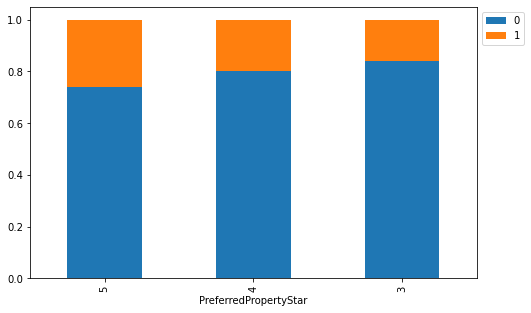

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


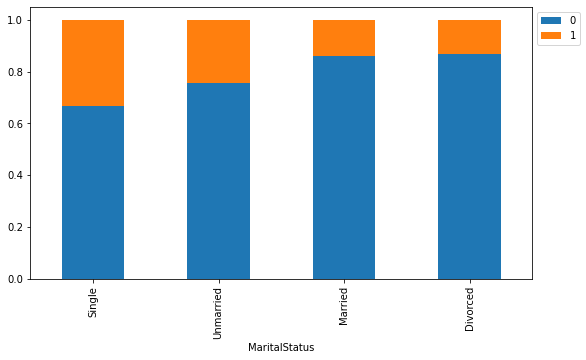

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


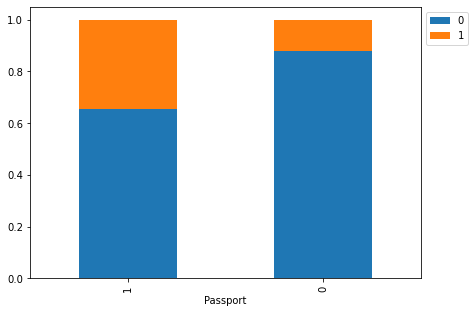

ProdTaken                  0    1   All
PitchSatisfactionScore                 
All                     3968  920  4888
3                       1162  316  1478
5                        760  210   970
4                        750  162   912
1                        798  144   942
2                        498   88   586
------------------------------------------------------------------------------------------------------------------------


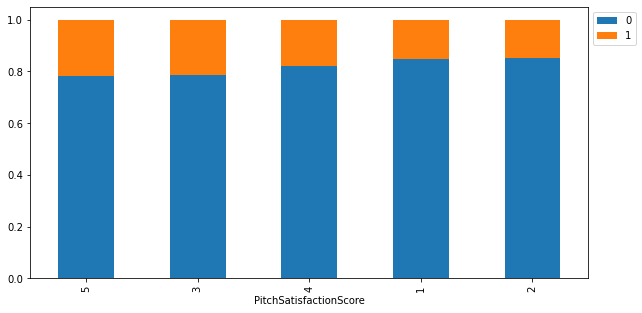

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


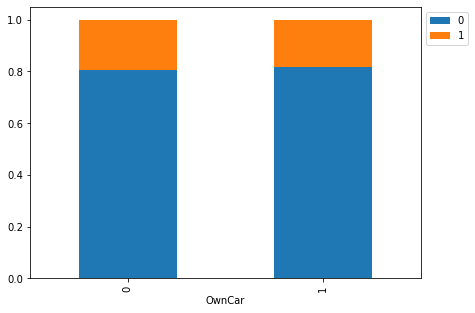

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3968  920  4888
1                         1747  399  2146
2                         1082  253  1335
0                          880  202  1082
3                          259   66   325
------------------------------------------------------------------------------------------------------------------------


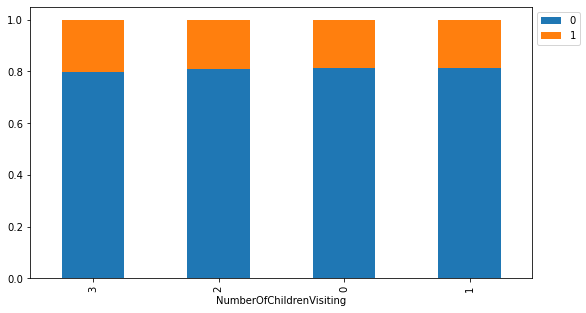

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


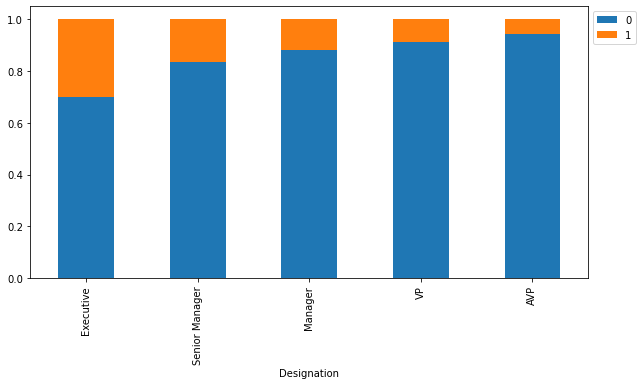

In [23]:
for i in cols_class:
    stacked_barplot(data, i, "ProdTaken")

**Summary EDA - Bivariate Analysis respect customers that purchased a package **
- There is no strong distinction respect trype of contract, gender, city tier,pitch satisfaction score, car ownership and number of children visiting against buyer and non-buyers from trip package.
- Next variables show a difference for choosing a package as: occupation since all free lancer and some large business purchased a trip package; number of followups has a increasing trend respect packages purchase, basic product shows the highest demand,single and unmarried customers travel more compared to married and divorced, people with passport purchase more packaged and executives travel more compared to senior position as consequence of more free time.


Text(0, 0.5, 'Density')

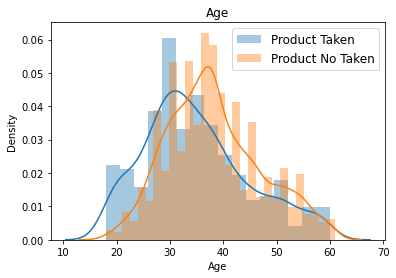

In [24]:
df = data[data.ProdTaken == 1]
sns.distplot(df['Age'],  kde=True, label='Product Taken')
df =data[data.ProdTaken == 0]
sns.distplot(df['Age'],  kde=True,label='Product No Taken')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

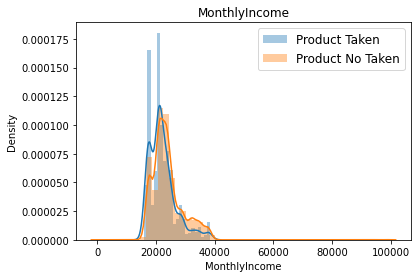

In [25]:
df = data[data.ProdTaken == 1]
sns.distplot(df['MonthlyIncome'],  kde=True, label='Product Taken')
df =data[data.ProdTaken == 0]
sns.distplot(df['MonthlyIncome'],  kde=True,label='Product No Taken')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

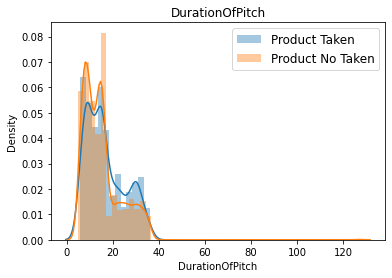

In [26]:
df = data[data.ProdTaken == 1]
sns.distplot(df['DurationOfPitch'],  kde=True, label='Product Taken')
df =data[data.ProdTaken == 0]
sns.distplot(df['DurationOfPitch'],  kde=True,label='Product No Taken')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('DurationOfPitch')
plt.xlabel('DurationOfPitch')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

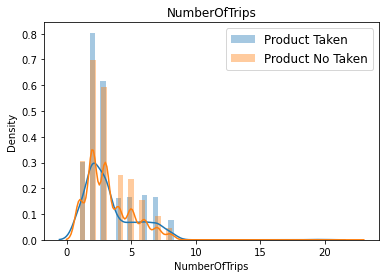

In [27]:
df = data[data.ProdTaken == 1]
sns.distplot(df['NumberOfTrips'],  kde=True, label='Product Taken')
df =data[data.ProdTaken == 0]
sns.distplot(df['NumberOfTrips'],  kde=True,label='Product No Taken')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('NumberOfTrips')
plt.xlabel('NumberOfTrips')
plt.ylabel('Density')

**Summary EDA - Bivariate Analysis respect customers that purchased a package **
- There is no strong distinction respect number of trips,duration of pitch and monthly income.
- Younger people is more likely to take trip packages rather old people. Mean for product taken is 30 and for no product taken is 40.


# 6.Feature Engineering

In [28]:
replaceStruct = {
                "ProductPitched":     {"Basic": 1, "Standard": 2 ,"Deluxe":3,"Super Deluxe":4, "King": 5},
                "Designation": {"Executive": 1, "Manager":2 , "Senior Manager": 3, "AVP": 4,"VP": 5}, 
                    }
oneHotCols=["TypeofContact","Occupation","Gender","MaritalStatus"]

In [29]:
data=data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols)
data.head(10)

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
0,200000,1,41,3,6,3,3,3,3,1,1,2,1,0,2,20993.0,0,1,0,0,1,0,1,0,0,0,1,0
1,200001,0,49,1,14,3,4,3,4,2,0,3,1,2,2,20130.0,1,0,0,0,1,0,0,1,1,0,0,0
2,200002,1,37,1,8,3,4,1,3,7,1,3,0,0,1,17090.0,0,1,1,0,0,0,0,1,0,0,1,0
3,200003,0,33,1,9,2,3,1,3,2,1,5,1,1,1,17909.0,1,0,0,0,1,0,1,0,1,0,0,0
4,200004,0,38,1,8,2,3,1,4,1,0,5,1,0,1,18468.0,0,1,0,0,0,1,0,1,1,0,0,0
5,200005,0,32,1,8,3,3,1,3,1,0,5,1,1,1,18068.0,1,0,0,0,1,0,0,1,0,0,1,0
6,200006,0,59,1,9,2,2,1,5,5,1,2,1,1,1,17670.0,0,1,0,0,0,1,1,0,1,0,0,0
7,200007,0,30,1,30,3,3,1,3,2,0,2,0,1,1,17693.0,0,1,0,0,1,0,0,1,0,1,0,0
8,200008,0,38,1,29,2,4,2,3,1,0,3,0,0,3,24526.0,1,0,0,0,1,0,0,1,0,0,0,1
9,200009,0,36,1,33,3,3,3,3,7,0,3,1,0,2,20237.0,0,1,0,0,0,1,0,1,1,0,0,0


# 7.Outlier
**Next 4 variables show outliers, hence, 5% of low and high values will be removed.

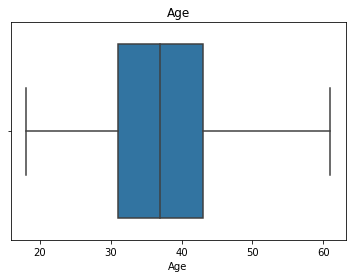

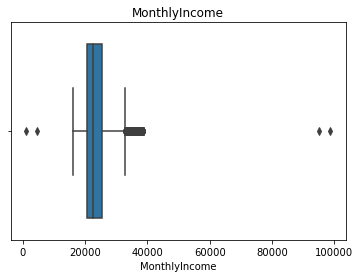

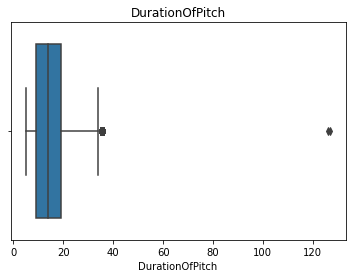

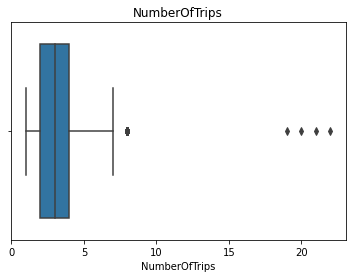

In [30]:
#Visualization of outliers from numerical variables
for colname in cols_num:
    sns.boxplot(data[colname])
    plt.title(colname)
    plt.show()

In [31]:
for colname in cols_num:
    quartiles = np.quantile(df[colname][df[colname].notnull()], [.05, .95])
    power_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
    outlier_powers = df.loc[np.abs(df[colname] - df[colname].median()) > power_4iqr, colname]
    df.drop(outlier_powers.index, axis=0, inplace=True)

Q1 = 25.0, Q3 = 55.0, 4*IQR = 120.0
Q1 = 17368.7, Q3 = 34856.74999999999, 4*IQR = 69952.19999999997
Q1 = 6.0, Q3 = 32.0, 4*IQR = 104.0
Q1 = 1.0, Q3 = 7.0, 4*IQR = 24.0


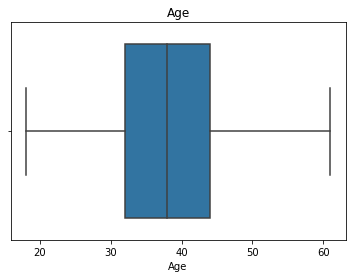

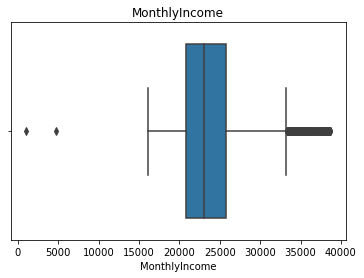

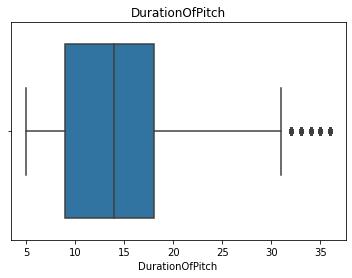

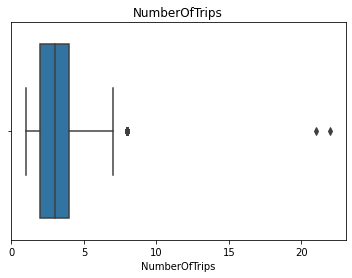

In [32]:
#Visualization without outliers from numerical variables
for colname in cols_num:
    sns.boxplot(df[colname])
    plt.title(colname)
    plt.show()

# 8. Modelling

1. Data preparation
2. Partition the data into train and test set.
3. Logistic models comparison
4. Decision tree comparison
5. Bagging models comparison
6. Boosting models comparison
7. Choosing best model

In [33]:
# Custmer ID does not provide information to predict the model,hence, it's removed
#Number of children and persons in the trip is highly correlated, therefore, number of children is removed to avoid multicollinearity
X = data.drop(["ProdTaken","CustomerID","NumberOfChildrenVisiting"], axis=1)
y = data["ProdTaken"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [35]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 2932
Number of rows in test data = 1956


In [36]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.823329
1    0.176671
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.794479
1    0.205521
Name: ProdTaken, dtype: float64



### Model can make wrong predictions as:
 
1. Predicting a customer that will not purchase the newly introduced travel package but in reality is interested in the product.

2. Predicting a customer that will purchase the newly introduced travel package but in reality the customer would not do it. 


### Which case is more important? 

* We want to maximize the potential customers who have higher probability of purchasing the newly introduced travel package.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

In [37]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [38]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [39]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

In [40]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
coef,-0.016989,0.485141,0.030606,-0.173941,0.37342,-0.560303,0.394116,0.035992,1.59498,0.117472,0.02673,-0.117301,0.000007,0.150691,-0.171117,0.529428,0.006837,-0.262183,-0.294509,-0.116395,0.095968,-0.52523,-0.376517,0.677399,0.203921


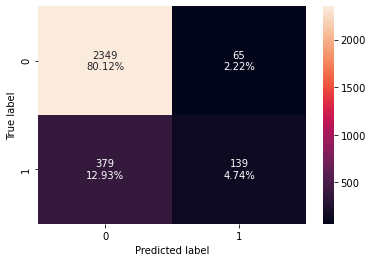

In [41]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [42]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.848568,0.26834,0.681373,0.385042


* ROC-AUC on training set

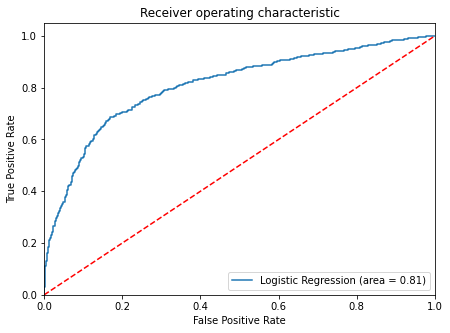

In [43]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set but the recall is low.

In [44]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2369229204682952


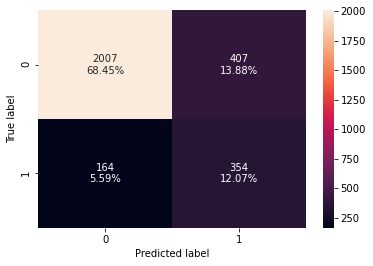

In [45]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [46]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805252,0.683398,0.465177,0.553557


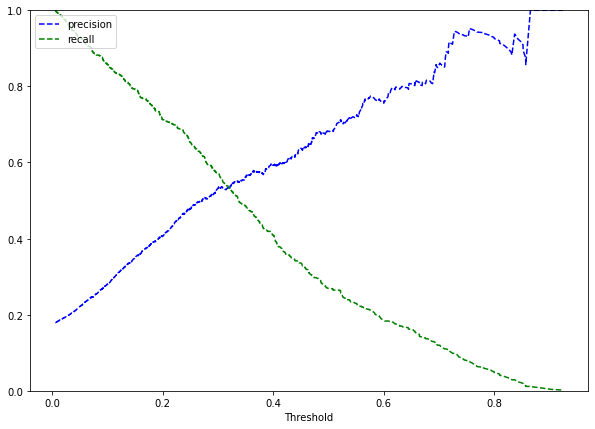

In [47]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [48]:
# setting the threshold
optimal_threshold_curve = 0.38

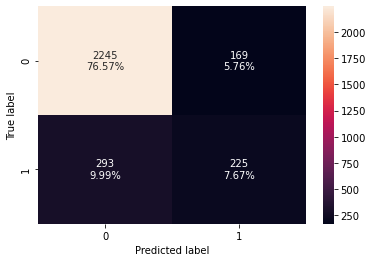

In [49]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [50]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.842428,0.434363,0.571066,0.493421


In [51]:
# 18.8% setting the probability loan threshold
prob_loan_threshold = 0.188

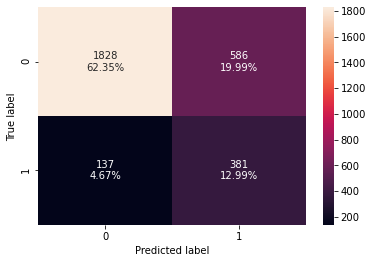

In [52]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=prob_loan_threshold
)


In [53]:
log_reg_model_train_prob_loan_threshold = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=prob_loan_threshold
)
print("Training performance:")
log_reg_model_train_prob_loan_threshold

Training performance:


,Accuracy,Recall,Precision,F1
0,0.753411,0.735521,0.394002,0.513131


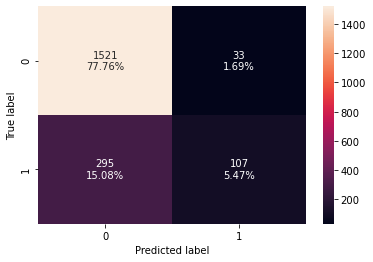

In [54]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [55]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.832311,0.266169,0.764286,0.394834


* ROC-AUC on test set

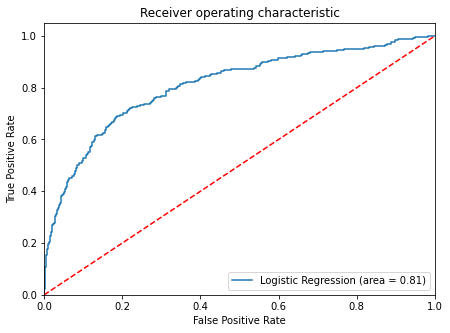

In [56]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

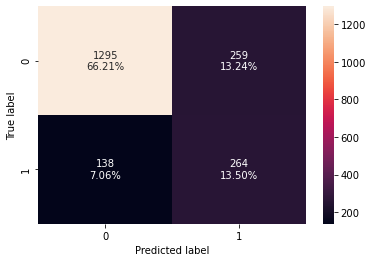

In [57]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [58]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.797035,0.656716,0.50478,0.570811


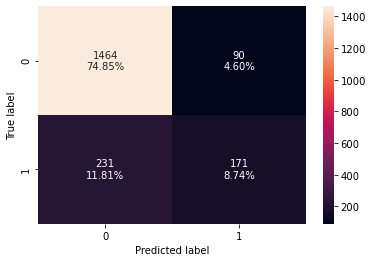

In [59]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [60]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.83589,0.425373,0.655172,0.515837


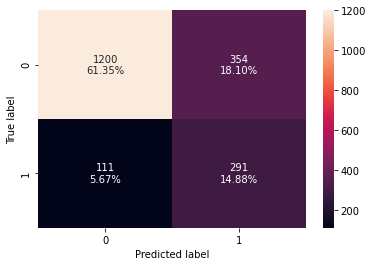

In [61]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=prob_loan_threshold
)

In [62]:
log_reg_model_test_prob_loan_threshold = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=prob_loan_threshold
)
print("Test performance:")
log_reg_model_test_prob_loan_threshold

Test performance:


,Accuracy,Recall,Precision,F1
0,0.76227,0.723881,0.451163,0.555874


In [63]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        log_reg_model_train_prob_loan_threshold.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.23 Threshold",
    "Logistic Regression-0.38 Threshold",
    "Logistic Regression-0.188 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.23 Threshold,Logistic Regression-0.38 Threshold,Logistic Regression-0.188 Threshold
Accuracy,0.848568,0.805252,0.842428,0.753411
Recall,0.268340,0.683398,0.434363,0.735521
Precision,0.681373,0.465177,0.571066,0.394002
F1,0.385042,0.553557,0.493421,0.513131


In [64]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_prob_loan_threshold.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.12 Threshold",
    "Logistic Regression-0.4 Threshold",
    "Logistic Regression-0.188 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.12 Threshold,Logistic Regression-0.4 Threshold,Logistic Regression-0.188 Threshold
Accuracy,0.832311,0.797035,0.835890,0.762270
Recall,0.266169,0.656716,0.425373,0.723881
Precision,0.764286,0.504780,0.655172,0.451163
F1,0.394834,0.570811,0.515837,0.555874


**Observations:**
- Logistic regression was measured with 4 different probablities (p) to purchase the newly introduced travel package.First p was chosen as 50%, second p was chosen according Optimal threshold as per AUC-ROC curve, thrid p was chosen according precision-recall curve and fourth p considered the sample probablity of choosing personal loan since data is imbalanced.
- The best logistic model is p=18.8%, it shows the highest recall and the recall difference between test and train sets is low.

## Decision Tree Model

In [65]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [66]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [68]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [69]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.19, 1: 0.81}, random_state=1
)

In [70]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

In [67]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

#### Checking model performance on training set

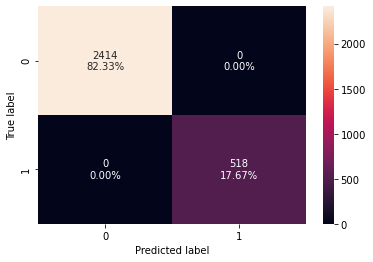

In [71]:

confusion_matrix_sklearn(model, X_train, y_train)

In [72]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


#### Checking model performance on test set

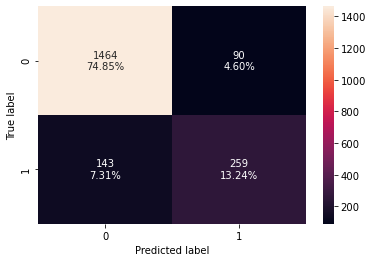

In [73]:
confusion_matrix_sklearn(model, X_test, y_test)

In [74]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.6442786069651741


In [75]:
## creating a list of column names
feature_names = X_train.columns.to_list()

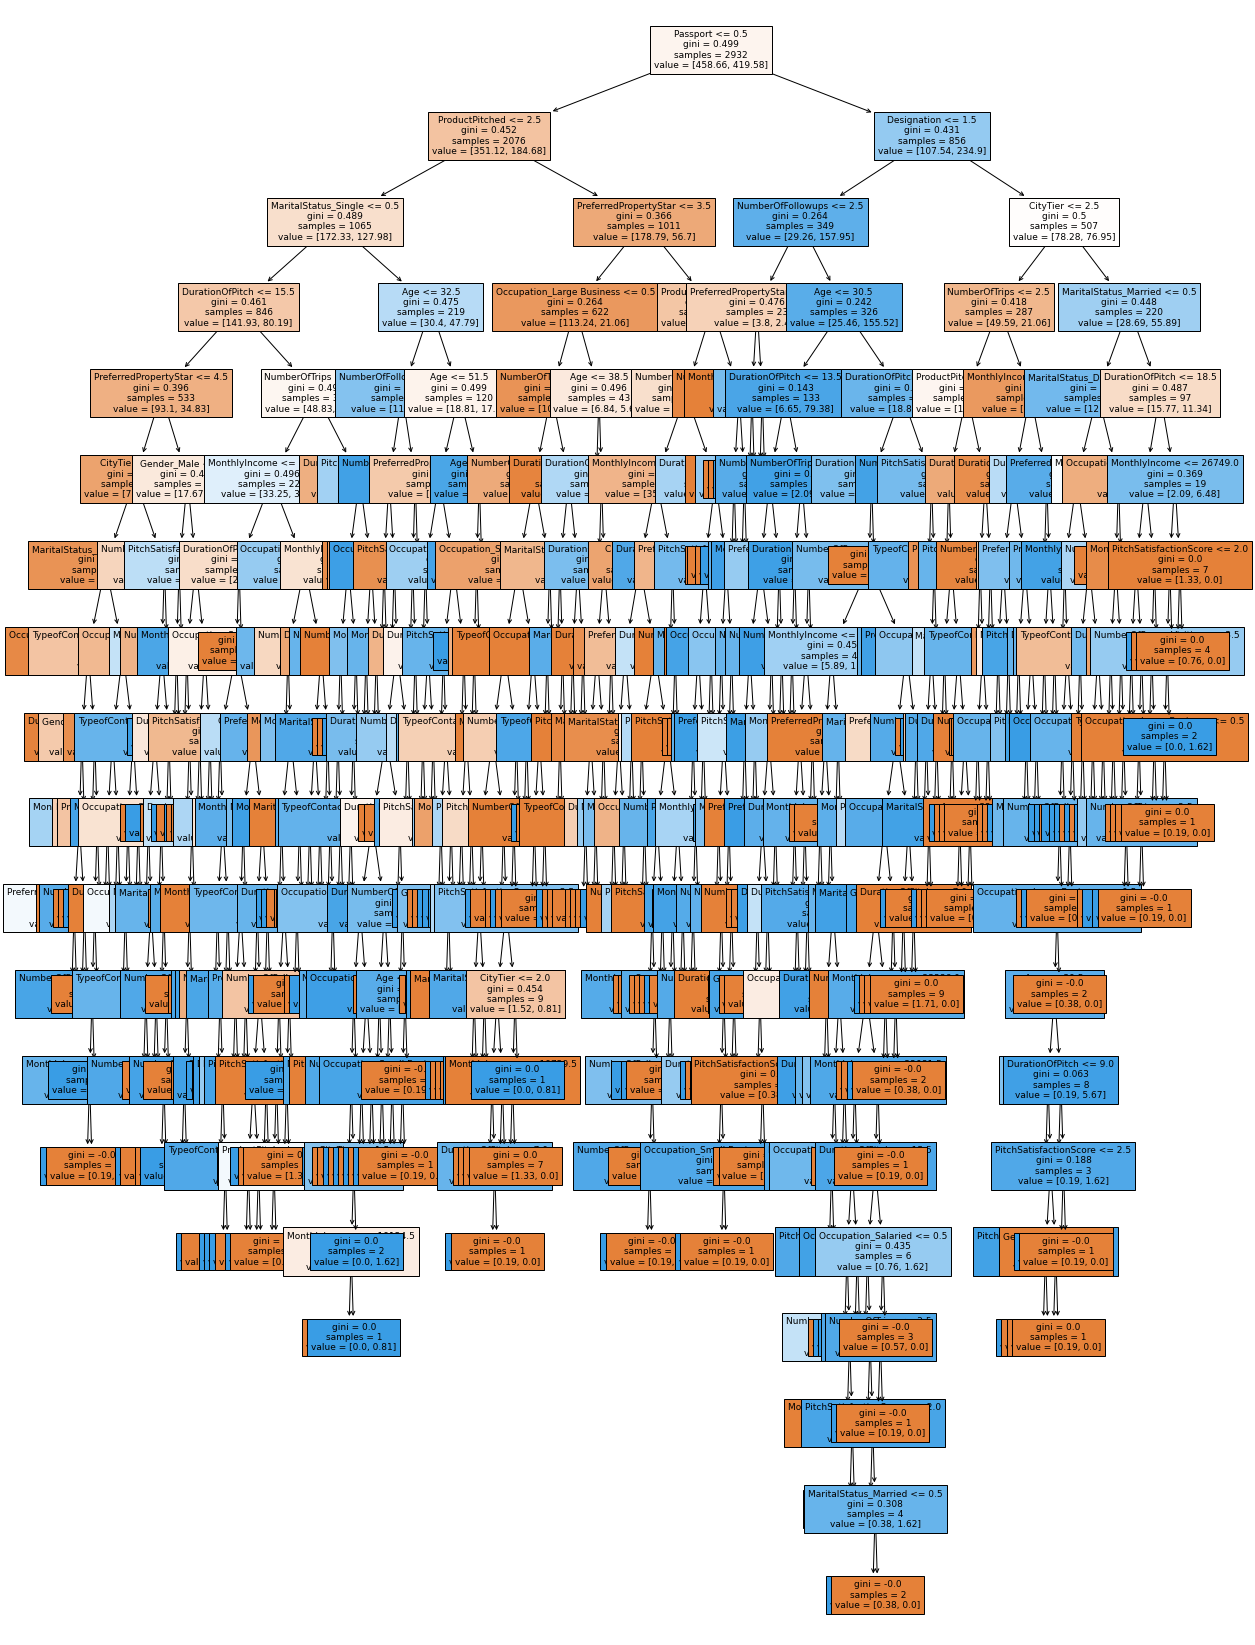

In [76]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [77]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.50
|   |--- ProductPitched <= 2.50
|   |   |--- MaritalStatus_Single <= 0.50
|   |   |   |--- DurationOfPitch <= 15.50
|   |   |   |   |--- PreferredPropertyStar <= 4.50
|   |   |   |   |   |--- CityTier <= 2.50
|   |   |   |   |   |   |--- MaritalStatus_Unmarried <= 0.50
|   |   |   |   |   |   |   |--- Occupation_Large Business <= 0.50
|   |   |   |   |   |   |   |   |--- DurationOfPitch <= 6.50
|   |   |   |   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |   |   |   |--- PreferredPropertyStar <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.76, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- PreferredPropertyStar >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.81] class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |   |   |   |--- Designation <= 2.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.85, 0.00] class: 0
|   |   |   |   |

In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
DurationOfPitch                0.114644
Passport                       0.111045
Age                            0.089160
MonthlyIncome                  0.085219
PitchSatisfactionScore         0.072968
NumberOfFollowups              0.071446
NumberOfTrips                  0.065354
Designation                    0.053712
PreferredPropertyStar          0.052101
ProductPitched                 0.046983
CityTier                       0.046202
TypeofContact_Company Invited  0.024236
Occupation_Large Business      0.022759
Occupation_Small Business      0.022482
MaritalStatus_Single           0.021416
Gender_Male                    0.017339
Occupation_Salaried            0.016967
MaritalStatus_Married          0.014390
NumberOfPersonVisiting         0.012317
OwnCar                         0.011009
MaritalStatus_Divorced         0.010981
MaritalStatus_Unmarried        0.009029
Gender_Female                  0.007196
TypeofContact_Self Enquiry     0.001044


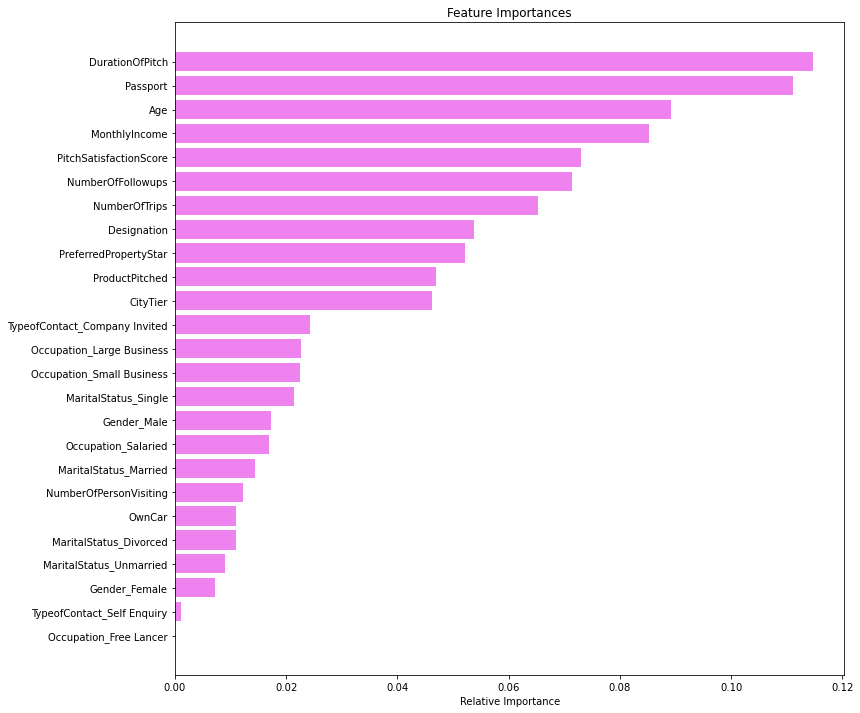

In [79]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Hyperparameter tuning 

In [80]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
                'max_depth': list(np.arange(1,10)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
}
             

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking performance on training set

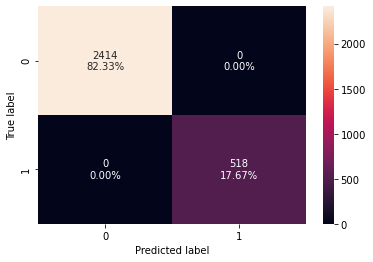

In [81]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [82]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 1.0


#### Checking performance on test set

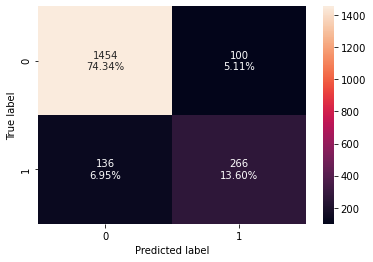

In [83]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [84]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.6616915422885572


In [85]:
## Visualizing the Decision Tree

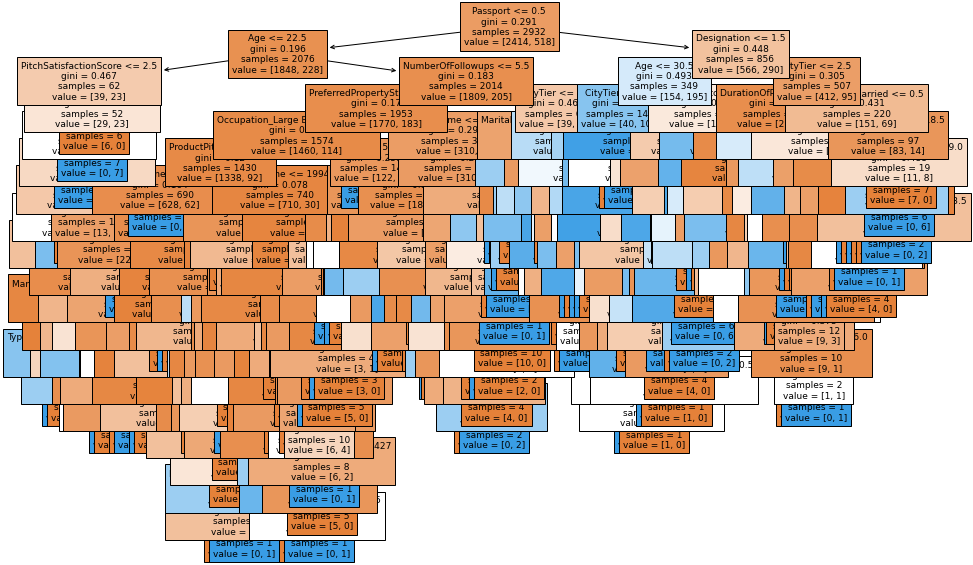

In [86]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [87]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.50
|   |--- Age <= 22.50
|   |   |--- PitchSatisfactionScore <= 2.50
|   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |--- PitchSatisfactionScore >  2.50
|   |   |   |--- MonthlyIncome <= 21427.50
|   |   |   |   |--- NumberOfFollowups <= 4.50
|   |   |   |   |   |--- MonthlyIncome <= 21356.50
|   |   |   |   |   |   |--- MonthlyIncome <= 17749.50
|   |   |   |   |   |   |   |--- NumberOfFollowups <= 3.50
|   |   |   |   |   |   |   |   |--- MonthlyIncome <= 17685.50
|   |   |   |   |   |   |   |   |   |--- Age <= 18.50
|   |   |   |   |   |   |   |   |   |   |--- Gender_Female <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- Gender_Female >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  18.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |  

In [88]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                    Imp
MonthlyIncome                  0.134466
Age                            0.119332
DurationOfPitch                0.103449
Designation                    0.080511
Passport                       0.074498
NumberOfFollowups              0.065820
PitchSatisfactionScore         0.062801
NumberOfTrips                  0.058728
CityTier                       0.044487
PreferredPropertyStar          0.039521
NumberOfPersonVisiting         0.029833
ProductPitched                 0.024945
MaritalStatus_Married          0.019711
Gender_Male                    0.019659
Occupation_Salaried            0.018121
OwnCar                         0.017591
Occupation_Small Business      0.017591
MaritalStatus_Single           0.015800
MaritalStatus_Unmarried        0.015219
MaritalStatus_Divorced         0.012957
Occupation_Large Business      0.010053
Gender_Female                  0.007481
TypeofContact_Self Enquiry     0.005207
TypeofContact_Company Invited  0.002219


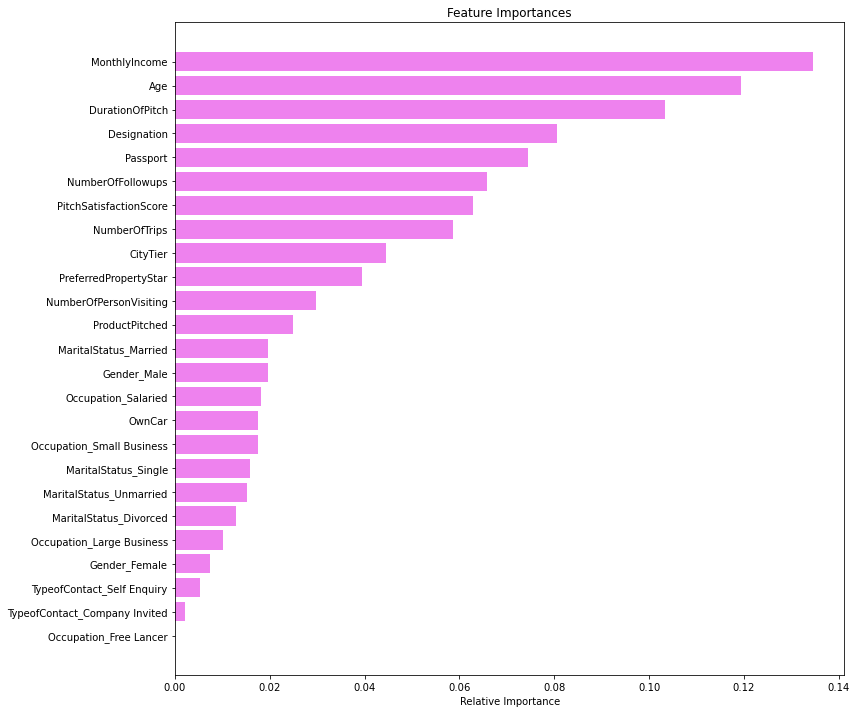

In [89]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------


In [90]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.19, 1: 0.81})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [91]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-5.383350e-16
1,2.161689e-19,-5.381189e-16
2,3.362627e-19,-5.377826e-16
3,3.362627e-19,-5.374463e-16
4,3.362627e-19,-5.371101e-16
...,...,...
250,8.243268e-03,3.983317e-01
251,1.033013e-02,4.086618e-01
252,1.153264e-02,4.201945e-01
253,2.340280e-02,4.435973e-01


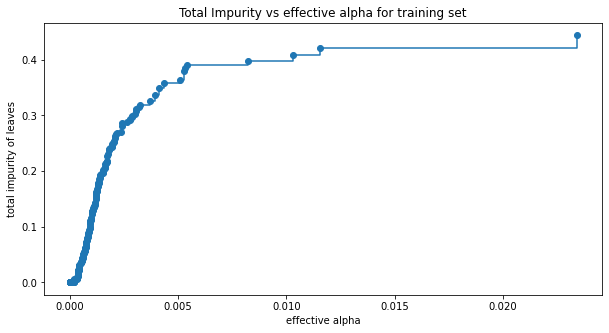

In [92]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [93]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.19, 1: 0.81}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05541268806482563


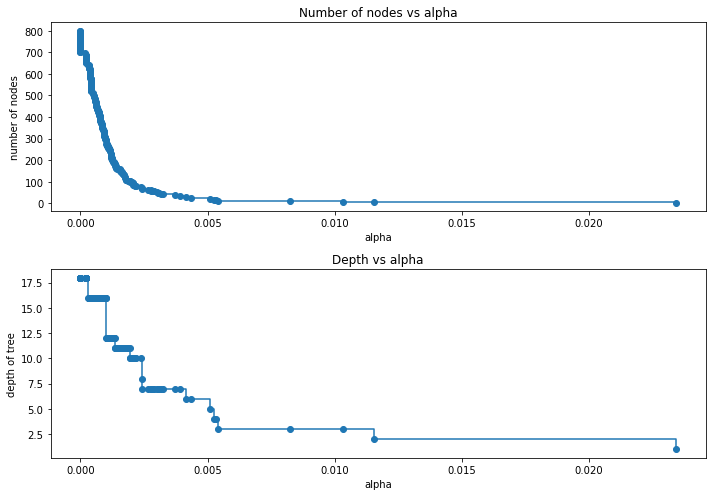

In [94]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [95]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [96]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [97]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

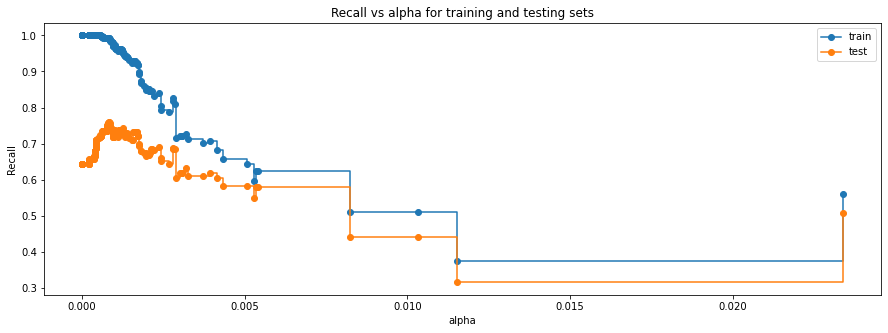

In [98]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [99]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0008165496032611615,
                       class_weight={0: 0.19, 1: 0.81}, random_state=1)


In [100]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0008165496032611615,
                       class_weight={0: 0.19, 1: 0.81}, random_state=1)

#### checking performance on training set

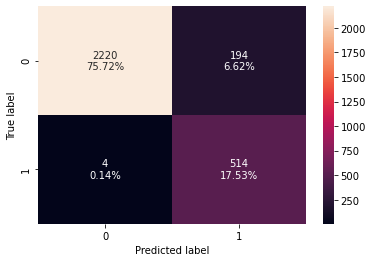

In [101]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [102]:
decision_tree_postpruned1_perf_train = get_recall_score(best_model, X_train, y_train)
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9922779922779923


#### checking performance on test set

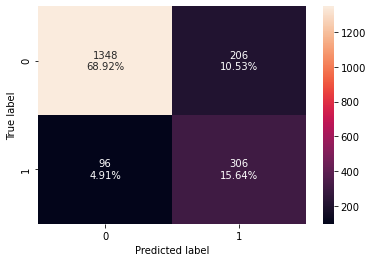

In [103]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [104]:
decision_tree_postpruned1_perf_test = get_recall_score(best_model, X_test, y_test)
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.7611940298507462


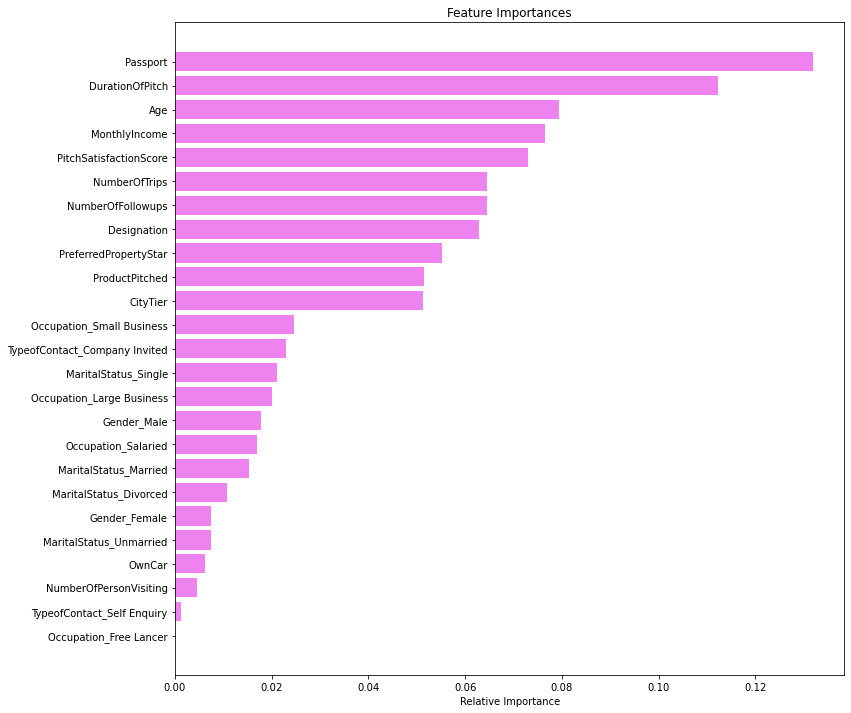

In [105]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

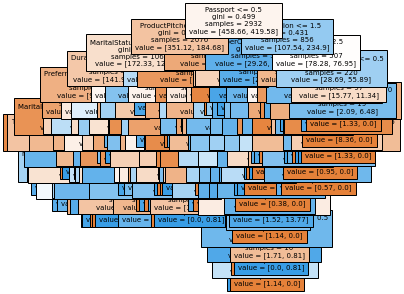

In [106]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=7,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model provides the highest recall, nevertheless, a more detailed tree will be explored in order to analyze business segmentation.
**Creating model with 0.002 ccp_alpha**

In [107]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.18, 1: 0.81}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.18, 1: 0.81},
                       random_state=1)

#### Checking performance on the training set

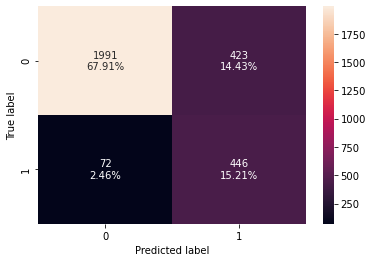

In [108]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [109]:
decision_tree_postpruned2_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned2_perf_train)

Recall Score: 0.861003861003861


#### Checking performance on the test set

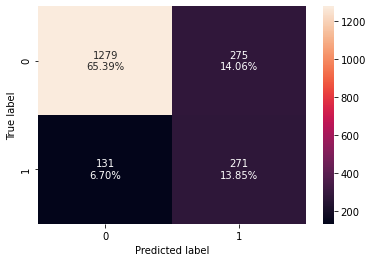

In [110]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [111]:
decision_tree_postpruned2_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned2_perf_train)

Recall Score: 0.861003861003861


### Visualizing the Decision Tree

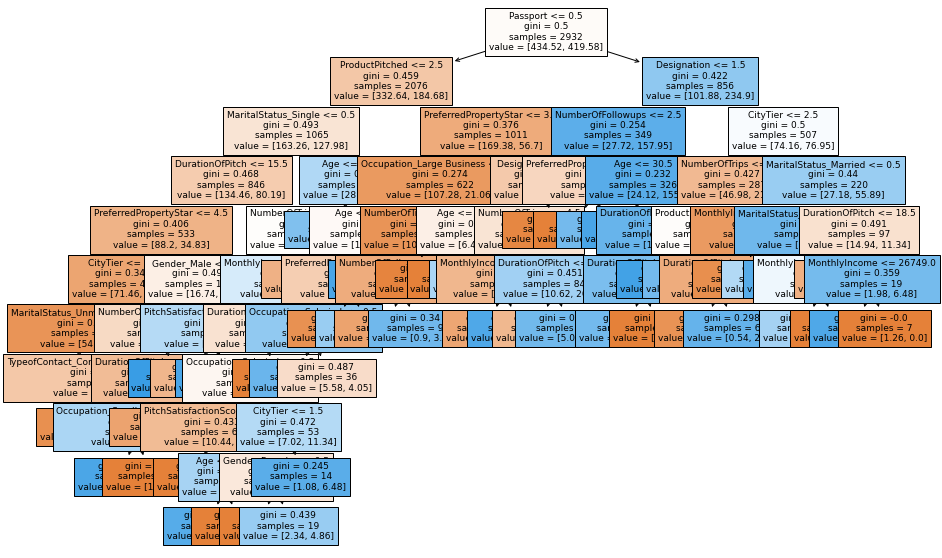

In [112]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [113]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.50
|   |--- ProductPitched <= 2.50
|   |   |--- MaritalStatus_Single <= 0.50
|   |   |   |--- DurationOfPitch <= 15.50
|   |   |   |   |--- PreferredPropertyStar <= 4.50
|   |   |   |   |   |--- CityTier <= 2.50
|   |   |   |   |   |   |--- MaritalStatus_Unmarried <= 0.50
|   |   |   |   |   |   |   |--- weights: [45.54, 3.24] class: 0
|   |   |   |   |   |   |--- MaritalStatus_Unmarried >  0.50
|   |   |   |   |   |   |   |--- TypeofContact_Company Invited <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.02, 0.81] class: 0
|   |   |   |   |   |   |   |--- TypeofContact_Company Invited >  0.50
|   |   |   |   |   |   |   |   |--- weights: [1.62, 4.05] class: 1
|   |   |   |   |   |--- CityTier >  2.50
|   |   |   |   |   |   |--- NumberOfFollowups <= 5.50
|   |   |   |   |   |   |   |--- DurationOfPitch <= 7.50
|   |   |   |   |   |   |   |   |--- Occupation_Small Business <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.36, 4.05] class: 1
|   |  

In [114]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Passport                       0.217169
Designation                    0.110688
DurationOfPitch                0.090353
CityTier                       0.066776
NumberOfTrips                  0.063578
PreferredPropertyStar          0.061695
ProductPitched                 0.059841
MonthlyIncome                  0.058557
Age                            0.050608
NumberOfFollowups              0.037751
PitchSatisfactionScore         0.034678
MaritalStatus_Single           0.032498
MaritalStatus_Married          0.020554
Gender_Male                    0.016047
Occupation_Salaried            0.016016
MaritalStatus_Divorced         0.011647
Occupation_Large Business      0.011283
TypeofContact_Company Invited  0.011268
Occupation_Small Business      0.010583
Gender_Female                  0.010042
MaritalStatus_Unmarried        0.008369
OwnCar                         0.000000
NumberOfPersonVisiting         0.000000
TypeofContact_Self Enquiry     0.000000


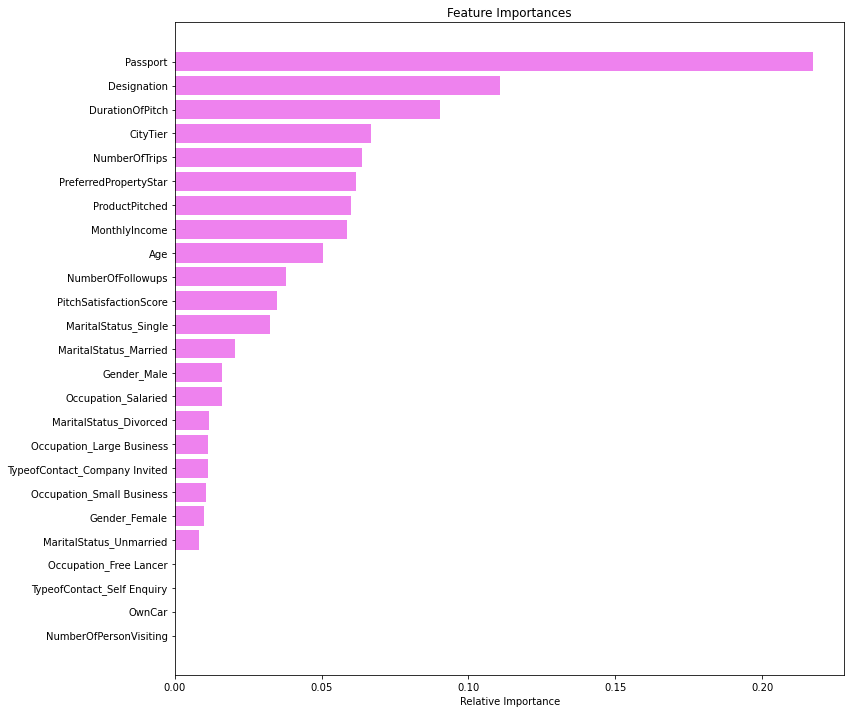

In [115]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing all the decision tree models

In [116]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned1_perf_train,
        decision_tree_postpruned2_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,1.000000
2,0.992278
3,0.861004


In [117]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned1_perf_test,
        decision_tree_postpruned2_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.644279
1,0.661692
2,0.761194
3,0.674129


**Observations:**
- Four decision models were analyzed: Full Decision tree, Decision tree model with pre-pruning, Decision tree model with post-pruning and Decision tree model with post-pruning & 0.002 ccp_alpha.
- None of these Decision tree models show a desirable performance since overfitting is visible in all models where recall in training set is almost 1 and testing set show a low recall value. 

## Bagging Classifier

In [118]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [119]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9918144611186903
Accuracy on test set :  0.8905930470347648
Recall on training set :  0.9536679536679536
Recall on test set :  0.527363184079602
Precision on training set :  1.0
Precision on test set :  0.8983050847457628


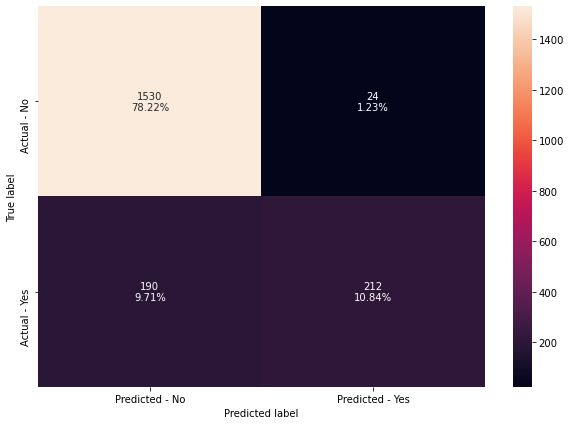

In [120]:
make_confusion_matrix(bagging_estimator,y_test)

## Random Forest Model

In [121]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [122]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.8936605316973415
Recall on training set :  1.0
Recall on test set :  0.5149253731343284
Precision on training set :  1.0
Precision on test set :  0.9409090909090909


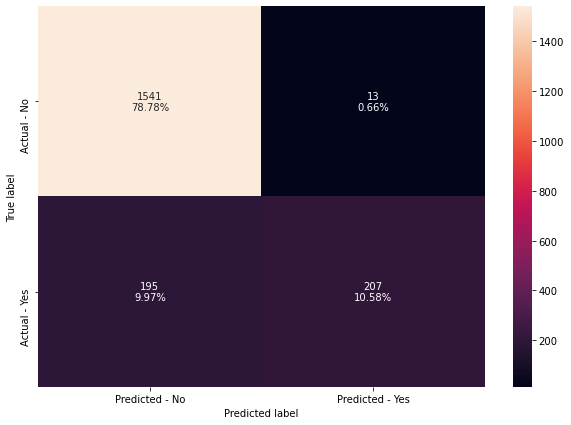

In [151]:
make_confusion_matrix(rf_estimator,y_test)

### Random Forest Decision Tree Hyperparameter Tuning
** Due to high complexity RF w hyperparameter was no able to be executed.**

### Logistic regression as the base estimator for bagging classifier:

In [124]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [125]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.8267394270122783
Accuracy on test set :  0.7985685071574642
Recall on training set :  0.021235521235521235
Recall on test set :  0.022388059701492536
Precision on training set :  0.9166666666666666
Precision on test set :  0.9


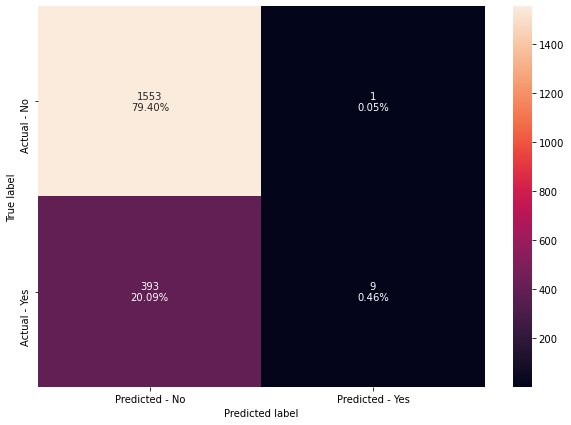

In [126]:
make_confusion_matrix(bagging_lr,y_test)

### Random Forest Classifier Logistic Hyperparameter
** Due to high complexity RF w hyperparameter was no able to be executed.**

### Random Forest with class_weights 
- The model performance is not very good. This may be due to the fact that the classes are imbalanced with 81% non-buyers and 19% buyers. 

In [127]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.81, 1: 0.19}],

}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.81, 1: 0.19}, random_state=1)

In [128]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  1.0
Accuracy on test set :  0.9054192229038854
Recall on training set :  1.0
Recall on test set :  0.5671641791044776
Precision on training set :  1.0
Precision on test set :  0.9539748953974896


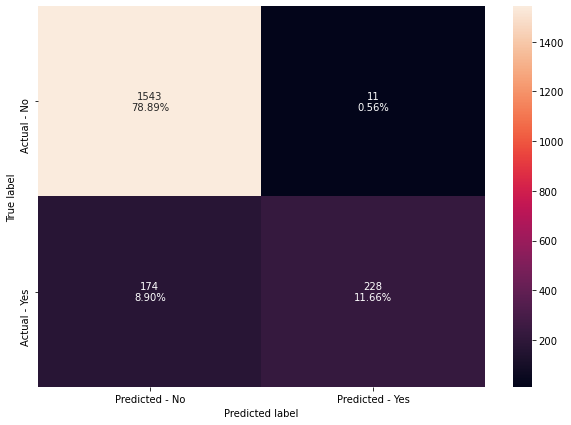

In [129]:
make_confusion_matrix(rf_estimator_weighted,y_test)

In [ ]:
make_confusion_matrix(rf_estimator_weighted,y_train)

### Checking the feature importance

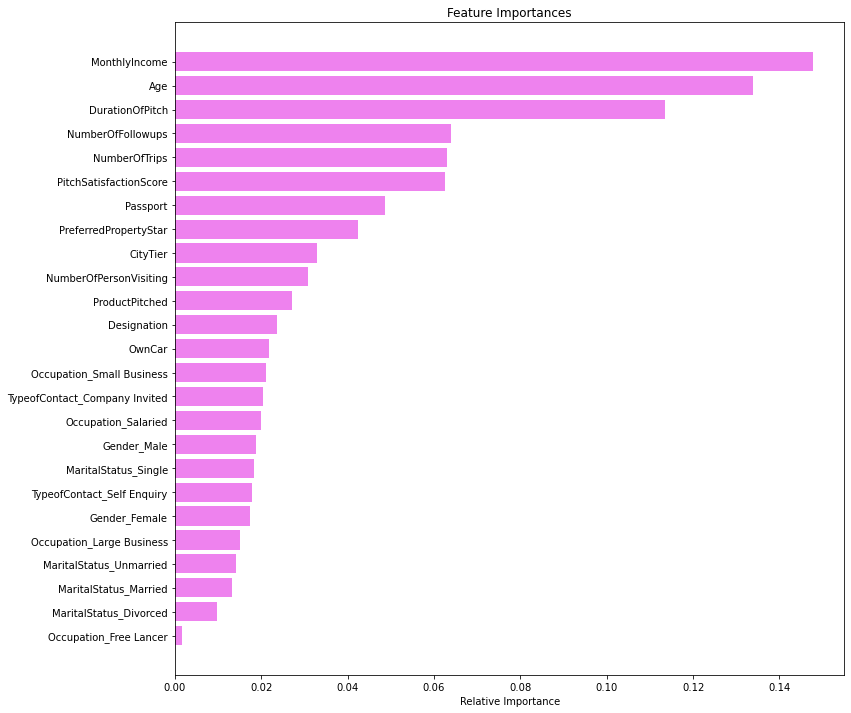

In [130]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing Bagging models 

In [154]:
# defining list of models
models = [bagging_estimator,bagging_lr,rf_estimator,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [155]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.89,0.95,0.53,1.00,0.90
1,Bagging classifier with base_estimator=LR,0.83,0.80,0.02,0.02,0.92,0.90
2,Random Forest with deafult parameters,1.00,0.89,1.00,0.51,1.00,0.94
3,Random Forest with class_weights,1.00,0.91,1.00,0.57,1.00,0.95


**Observations:**
- Four bagging models were analyzed: Bagging Classifier using Decision Tree models, Bagging Classifier using Logistic regression models, Random Forest and Random Forest with  weighted values for imbalanced data. 
- None of these bagging models show a desirable performance since overfitting is visible in all models where recall in training set is almost 1 and testing set show a low recall value. Bagging classifier with base_estimator=LR	is the only model which does not show overfitting, however, recall value is almost 0 so it is the poorest model among all.

## Boosting Models:

### AdaBoost Regressor

In [132]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [133]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.852319236016371
Accuracy on test set :  0.8266871165644172
Recall on training set :  0.32432432432432434
Recall on test set :  0.2935323383084577
Precision on training set :  0.6693227091633466
Precision on test set :  0.6820809248554913


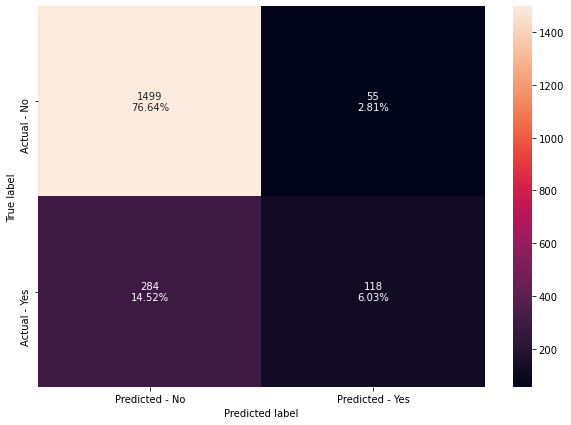

In [134]:
make_confusion_matrix(abc,y_test)

### Hyperparameter Tuning

In [135]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.3000000000000003, n_estimators=100,
                   random_state=1)

In [136]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9969304229195088
Accuracy on test set :  0.876278118609407
Recall on training set :  0.9845559845559846
Recall on test set :  0.5895522388059702
Precision on training set :  0.9980430528375733
Precision on test set :  0.7547770700636943


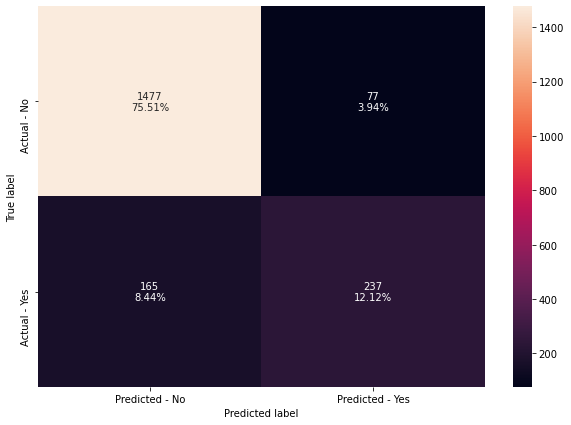

In [137]:
make_confusion_matrix(abc_tuned,y_test)

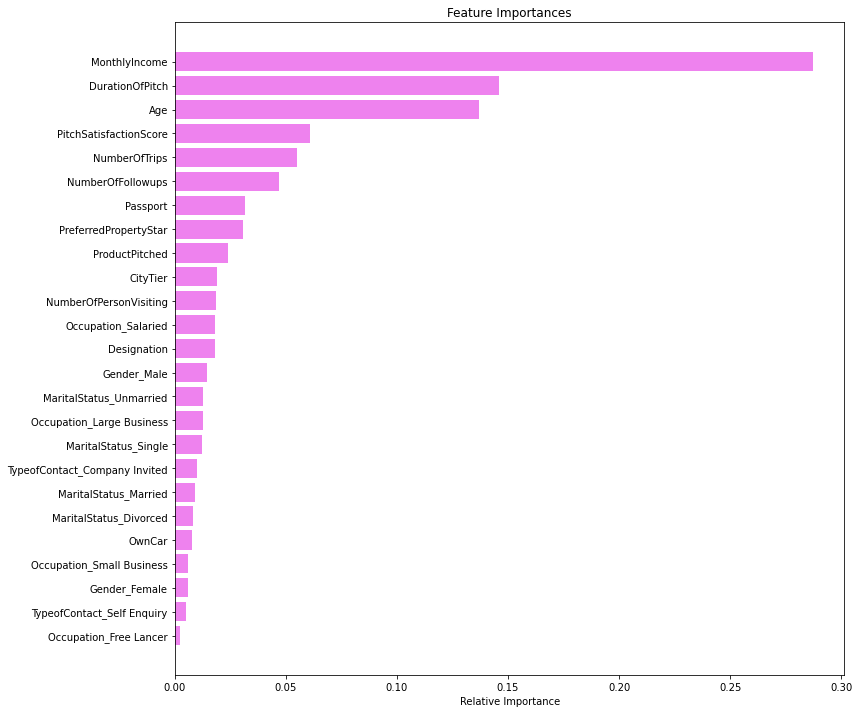

In [138]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Machine

In [139]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [140]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8908594815825375
Accuracy on test set :  0.8496932515337423
Recall on training set :  0.45366795366795365
Recall on test set :  0.3358208955223881
Precision on training set :  0.8639705882352942
Precision on test set :  0.8333333333333334


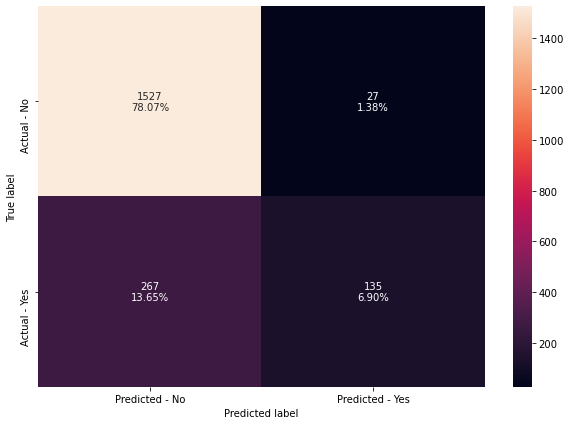

In [141]:
make_confusion_matrix(gbc,y_test)

### Hyperparameter Tuning

In [142]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,20],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=50, random_state=1,
                           subsample=0.9)

In [143]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.8727830832196453
Accuracy on test set :  0.8353783231083844
Recall on training set :  0.3532818532818533
Recall on test set :  0.26119402985074625
Precision on training set :  0.8280542986425339
Precision on test set :  0.8076923076923077


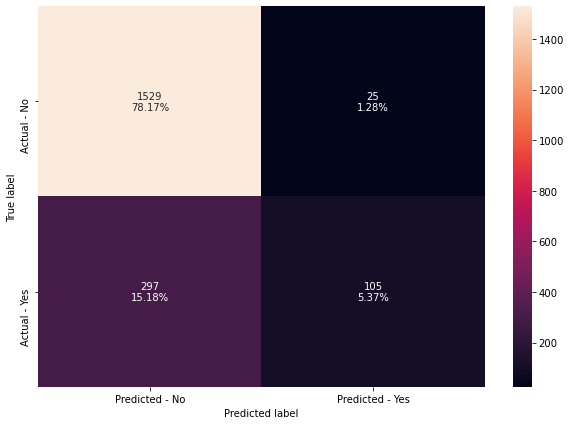

In [144]:
make_confusion_matrix(gbc_tuned,y_test)

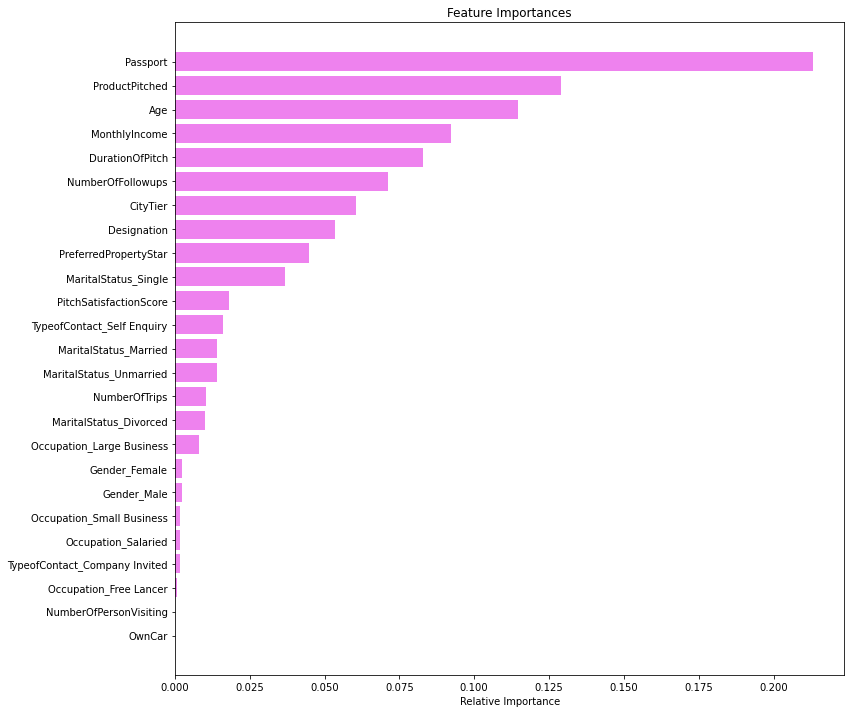

In [145]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Regressor

In [146]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [147]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9074642126789366
Recall on training set :  1.0
Recall on test set :  0.6019900497512438
Precision on training set :  1.0
Precision on test set :  0.9201520912547528


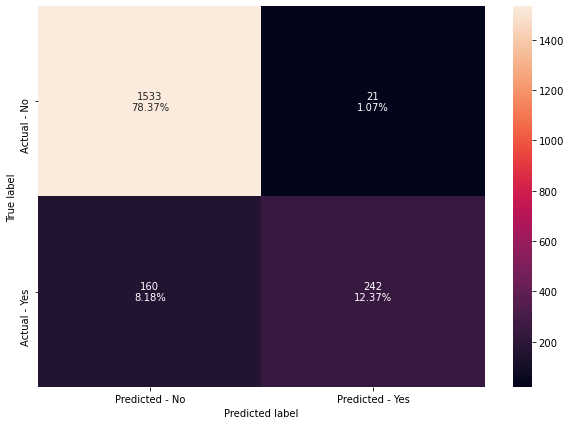

In [148]:
make_confusion_matrix(xgb,y_test)

### XGBM Hyperparameter Tuning
** Due to high complexity RF w hyperparameter was no able to be executed.**

## Comparing all models

In [149]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_tuned, xgb, ]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [150]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters',
                                          'Gradient Boosting Tuned','XGBoost with default parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.85,0.83,0.32,0.29,0.67,0.68
1,AdaBoost Tuned,1.00,0.88,0.98,0.59,1.00,0.75
2,Gradient Boosting with default parameters,0.89,0.85,0.45,0.34,0.86,0.83
3,Gradient Boosting Tuned,0.87,0.84,0.35,0.26,0.83,0.81
4,XGBoost with default parameters,1.00,0.91,1.00,0.60,1.00,0.92


**Observations:**
- Five boosting models were analyzed: AdaBoost, AdaBoost with post-pruning,GBM, GBM with post-pruning and XGBoost. 
- None of these boosting models show a desirable performance since overfitting is visible in all models where recall in training set is almost 1 and testing set show a low recall value. Gradient Boosting with default parameters is the best boosting model that do not show overfitting, however, logistic model shows higher recall results.

### Conclusions

- To predict which customer is more likely to purchase the newly introduced travel package  "Product Taken" was analyzed using logistic regression, Decision Tree Classifier,bagging and boosting models.
- The model built identifies the potential customers who have higher probability of purchasing a travel package. Therefore, maximizing recall will reduce the chances of offering a trip package who is not interested.
- Logistic model with p=18.8% was chosen for customer segmentation compared to the remaining models. Due to complexity from some boosting and bagging model with post-pruning, comparison was not possible and logistic model was preferred in terms of recall results and time. Logistic model shows a Train recall to 0.73 and test recall to .72, hence, difference is slight and overfitting is avoided.
- Imbalanced classes were analyzed with post-prunning and weighted filters and an easy interpretation was obtained including logistic model with probability.
- Monthly Income, age and duration of pitch are the most important variables on predicting the customers that will take a trip package. 
- The importance of hyper-parameters and post-pruning was analyzed in order to reduce overfitting and time.

### Recommendations

According to the chosen model,  marketing campaign should be targeted to customer segment a) and improve company characteristics b).

    a) Young customers(below 40 years) that has passport and low level occupation which allow them enoying free time. 
    b) Company should provide a high number of followups and offers basic/affordable products for young and low income segment.
